## Michael's hypothesis (non-exonic and non-enhancer windows)

Michael: gBGC may occur in regions that are GC-poor, in addition to regions that are GC-rich. The expected impact upon Chen performance will differ in either case. Therefore repeat analyses, this time stratifying by GC content. 


In [1]:
CONSTRAINT_TOOLS = '/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools'
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'

import sys
sys.path.append(f'{CONSTRAINT_TOOLS}/utilities')

GC_WINDOW_SIZE = 100000

In [2]:
import pandas as pd
from functools import reduce

def get_windows_with_GC_content_and_cpg_islands(): 
  df1 = pd.read_csv(
    f'{CONSTRAINT_TOOLS_DATA}/chen-et-al-2023-published-version/41586_2023_6045_MOESM4_ESM/Supplementary_Data_2.gnocchi.N_expected.N_observed.B.paternal_recombination_rate.maternal_recombination_rate.gBGC-tract-counts.non-exonic.gBGC.bed', 
    sep='\t', 
  )

  df2 = pd.read_csv(
    f'{CONSTRAINT_TOOLS_DATA}/chen-et-al-2023-published-version/41586_2023_6045_MOESM4_ESM/Supplementary_Data_2.GC_content_{GC_WINDOW_SIZE}.bed', 
    sep='\t', 
  )
  df2 = df2[['chen_chrom', 'chen_start', 'chen_end', 'window_GC_content']]
  df2 = df2.rename(columns={
    'chen_chrom': 'chrom', 
    'chen_start': 'start', 
    'chen_end': 'end',
    'window_GC_content': f'GC_content_{GC_WINDOW_SIZE}bp'
  })

  # created using: experiments/germline-model/chen-et-al-2022/cpg-island-enrichment.ipynb
  df3 = pd.read_csv(
    f'{CONSTRAINT_TOOLS_DATA}/benchmark-genome-wide-predictions/chen-et-al-2022/mchale.kmerSizes.trainSets.noisy.enhancer-exon-cpgIsland.bed',
    sep='\t', 
  )
  df3 = df3[['chromosome', 'start', 'end', 'cpg_island overlap', 'window overlaps cpg_island']]
  df3 = df3.rename(columns={
    'chromosome': 'chrom', 
    'cpg_island overlap': 'cpg_island_overlap', 
    'window overlaps cpg_island': 'window_overlaps_cpg_island'
  })

  dfs = [df1, df2, df3]
  df = reduce(lambda left, right: pd.merge(left, right, on=['chrom', 'start', 'end'], how='inner'), dfs)

  df = df[df['window overlaps enhancer'] == False]

  return df

WINDOWS = get_windows_with_GC_content_and_cpg_islands()
WINDOWS

,chrom,start,end,gnocchi,N_expected,N_observed,window overlaps enhancer,window overlaps merged_exon,B,paternal_recombination_rate,...,log10_paternal_recombination_rate,log10_maternal_recombination_rate,B_M1star.EUR,B0_M3starHMT6.EUR,B1_M3starHMT6.EUR,Bmean_M3starHMT6.EUR,lambda_M3starHMT6.EUR,GC_content_100000bp,cpg_island_overlap,window_overlaps_cpg_island
1,chr1,1451000,1452000,0.666316,302.590657,291,False,False,0.652,0.039046,...,-1.408422,-1.587499,0.108103,0.057741,0.513191,0.105518,2.585568,0.572894,NaN,False
2,chr1,1453000,1454000,0.828398,269.601925,256,False,False,0.651,0.039046,...,-1.408422,-1.587499,0.108103,0.057741,0.513191,0.105518,2.585568,0.572564,NaN,False
3,chr1,1458000,1459000,-0.086128,270.583243,272,False,False,0.651,0.039046,...,-1.408422,-1.587499,0.108103,0.057741,0.513191,0.105518,2.585568,0.570774,NaN,False
5,chr1,1467000,1468000,2.958469,326.453703,273,False,False,0.651,0.039046,...,-1.408422,-1.587499,0.108103,0.057741,0.513191,0.105518,2.585568,0.583014,NaN,False
6,chr1,1476000,1477000,-0.662737,289.719448,301,False,False,0.651,0.039046,...,-1.408422,-1.587499,0.108103,0.057741,0.513191,0.105518,2.585568,0.582994,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019141,chr9,137136000,137137000,3.277688,316.292417,258,False,False,0.555,0.150095,...,-0.823635,-2.268173,0.165515,0.135944,3.636507,0.219258,2.281162,0.588594,NaN,False
1019142,chr9,137137000,137138000,2.779895,302.336307,254,False,False,0.555,14.102295,...,1.149290,0.230147,0.165515,0.135944,3.636507,0.219258,2.281162,0.587014,NaN,False
1019143,chr9,137138000,137139000,3.286597,273.337005,219,False,False,0.556,0.150095,...,-0.823635,-2.268173,0.165515,0.135944,3.636507,0.219258,2.281162,0.588514,217.0,True
1019144,chr9,137146000,137147000,6.685589,364.670293,237,False,False,0.556,0.004152,...,-2.381710,-3.603883,0.165515,0.135944,3.636507,0.219258,2.281162,0.600204,116.0,True


In [3]:
import matplotlib.pyplot as plt
from aggregate import aggregate
import numpy as np

In [4]:
def get_low_GC_content_windows(df): 
  df = df[df[f'GC_content_{GC_WINDOW_SIZE}bp'] < 0.4]
  return df 

get_low_GC_content_windows(WINDOWS)

,chrom,start,end,gnocchi,N_expected,N_observed,window overlaps enhancer,window overlaps merged_exon,B,paternal_recombination_rate,...,log10_paternal_recombination_rate,log10_maternal_recombination_rate,B_M1star.EUR,B0_M3starHMT6.EUR,B1_M3starHMT6.EUR,Bmean_M3starHMT6.EUR,lambda_M3starHMT6.EUR,GC_content_100000bp,cpg_island_overlap,window_overlaps_cpg_island
2323,chr1,8576000,8577000,-0.888816,190.725161,203,False,False,0.626,0.129473,...,-0.887822,-1.262098,0.319237,0.126266,2.668146,0.313348,2.173726,0.396386,NaN,False
2324,chr1,8577000,8578000,-0.992706,228.978343,244,False,False,0.626,0.129473,...,-0.887822,-1.262098,0.319237,0.126266,2.668146,0.313348,2.173726,0.397306,NaN,False
2330,chr1,8584000,8585000,1.024061,197.387513,183,False,False,0.626,0.129473,...,-0.887822,-1.262098,0.319237,0.126266,2.668146,0.313348,2.173726,0.396276,NaN,False
2331,chr1,8585000,8586000,-0.781222,192.170273,203,False,False,0.626,0.129473,...,-0.887822,-1.262098,0.319237,0.126266,2.668146,0.313348,2.173726,0.396316,NaN,False
2339,chr1,8594000,8595000,1.174579,211.064352,194,False,False,0.626,0.129473,...,-0.887822,-1.262098,0.319237,0.126266,2.668146,0.313348,2.173726,0.396326,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016394,chr9,125881000,125882000,0.821172,183.112001,172,False,False,0.536,0.015399,...,-1.812521,-2.096038,0.582497,0.468956,14.994775,1.061610,2.053580,0.359096,NaN,False
1016395,chr9,125882000,125883000,1.849230,201.232524,175,False,False,0.536,0.015399,...,-1.812521,-2.096038,0.582497,0.468956,14.994775,1.061610,2.053580,0.358826,NaN,False
1016405,chr9,125893000,125894000,1.915657,192.584492,166,False,False,0.536,0.015399,...,-1.812521,-2.096038,0.582497,0.468956,14.994775,1.061610,2.053580,0.358506,NaN,False
1016407,chr9,125898000,125899000,1.053570,189.503476,175,False,False,0.536,0.015399,...,-1.812521,-2.096038,0.582497,0.468956,14.994775,1.061610,2.053580,0.360916,NaN,False


In [5]:
def get_high_GC_content_windows(df): 
  df = df[df[f'GC_content_{GC_WINDOW_SIZE}bp'] > 0.4]
  return df 

get_high_GC_content_windows(WINDOWS)

,chrom,start,end,gnocchi,N_expected,N_observed,window overlaps enhancer,window overlaps merged_exon,B,paternal_recombination_rate,...,log10_paternal_recombination_rate,log10_maternal_recombination_rate,B_M1star.EUR,B0_M3starHMT6.EUR,B1_M3starHMT6.EUR,Bmean_M3starHMT6.EUR,lambda_M3starHMT6.EUR,GC_content_100000bp,cpg_island_overlap,window_overlaps_cpg_island
1,chr1,1451000,1452000,0.666316,302.590657,291,False,False,0.652,0.039046,...,-1.408422,-1.587499,0.108103,0.057741,0.513191,0.105518,2.585568,0.572894,NaN,False
2,chr1,1453000,1454000,0.828398,269.601925,256,False,False,0.651,0.039046,...,-1.408422,-1.587499,0.108103,0.057741,0.513191,0.105518,2.585568,0.572564,NaN,False
3,chr1,1458000,1459000,-0.086128,270.583243,272,False,False,0.651,0.039046,...,-1.408422,-1.587499,0.108103,0.057741,0.513191,0.105518,2.585568,0.570774,NaN,False
5,chr1,1467000,1468000,2.958469,326.453703,273,False,False,0.651,0.039046,...,-1.408422,-1.587499,0.108103,0.057741,0.513191,0.105518,2.585568,0.583014,NaN,False
6,chr1,1476000,1477000,-0.662737,289.719448,301,False,False,0.651,0.039046,...,-1.408422,-1.587499,0.108103,0.057741,0.513191,0.105518,2.585568,0.582994,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019141,chr9,137136000,137137000,3.277688,316.292417,258,False,False,0.555,0.150095,...,-0.823635,-2.268173,0.165515,0.135944,3.636507,0.219258,2.281162,0.588594,NaN,False
1019142,chr9,137137000,137138000,2.779895,302.336307,254,False,False,0.555,14.102295,...,1.149290,0.230147,0.165515,0.135944,3.636507,0.219258,2.281162,0.587014,NaN,False
1019143,chr9,137138000,137139000,3.286597,273.337005,219,False,False,0.556,0.150095,...,-0.823635,-2.268173,0.165515,0.135944,3.636507,0.219258,2.281162,0.588514,217.0,True
1019144,chr9,137146000,137147000,6.685589,364.670293,237,False,False,0.556,0.004152,...,-2.381710,-3.603883,0.165515,0.135944,3.636507,0.219258,2.281162,0.600204,116.0,True


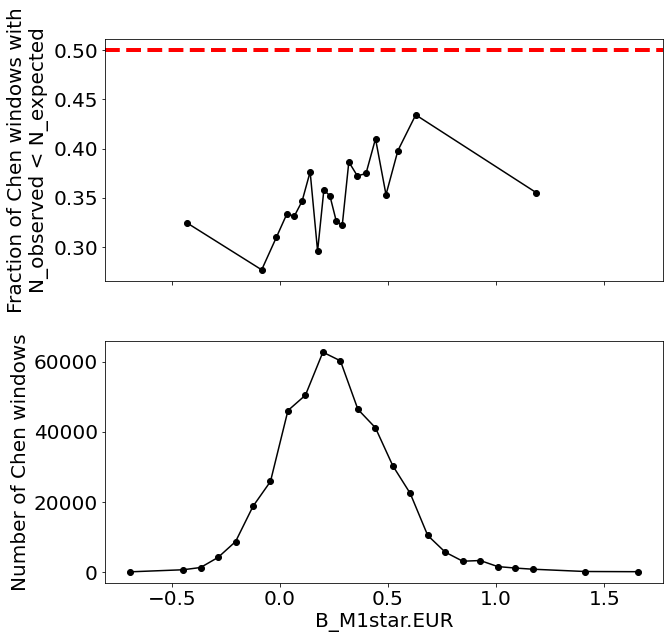

In [6]:
plt.rcParams.update({
  'font.size': 20,
})

def plot_fraction_below_diag(df, feature, number_quantiles=20, number_bins=30, ylim=None):  
  df = df.copy() 

  df = df.dropna(subset=[feature])  

  df[f'{feature}_quantile'] = pd.qcut(df[feature], q=number_quantiles, labels=None, retbins=False)
  df[f'{feature}_bin'] = pd.cut(df[feature], bins=number_bins)

  df[f'{feature}_quantile_mid'] = df[f'{feature}_quantile'].apply(lambda x: x.mid).astype(float)
  df[f'{feature}_bin_mid'] = df[f'{feature}_bin'].apply(lambda x: x.mid).astype(float)

  df['below_diag'] = df['N_observed'] < df['N_expected']

  df_by_quantile = aggregate(
    df, 
    group_columns = [f'{feature}_quantile_mid'],
    aggregation_functions = {
      'below_diag': [np.mean],
    }
  )
  df_by_quantile = df_by_quantile.rename(columns={
    'mean below_diag': 'fraction_below_diag',
  })
  
  df_by_bin = aggregate(
    df, 
    group_columns = [f'{feature}_bin_mid'],
    aggregation_functions = {
      feature: ['count']
    }
  )

  fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
  fig.subplots_adjust(hspace=0.25)

  axs[0].plot(df_by_quantile[f'{feature}_quantile_mid'], df_by_quantile['fraction_below_diag'], 'o-', color='black')
  axs[0].axhline(y=0.5, color='red', linestyle='--', linewidth=4)
  axs[0].set_ylabel('Fraction of Chen windows with\nN_observed < N_expected')
  axs[0].set_ylim(ylim)

  axs[1].plot(df_by_bin[f'{feature}_bin_mid'], df_by_bin[f'count {feature}'], 'o-', color='black')
  axs[1].set_ylabel('Number of Chen windows')

  axs[1].set_xlabel(feature)

plot_fraction_below_diag(get_low_GC_content_windows(WINDOWS), feature='B_M1star.EUR')  

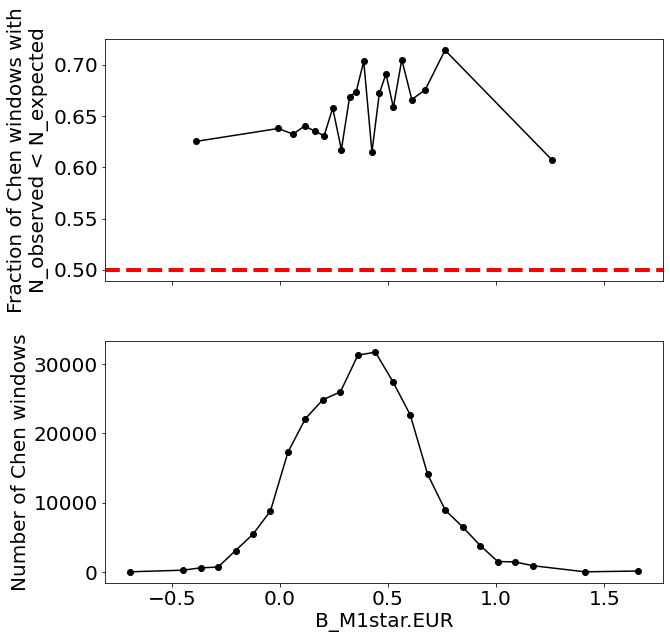

In [7]:
plot_fraction_below_diag(get_high_GC_content_windows(WINDOWS), feature='B_M1star.EUR')  

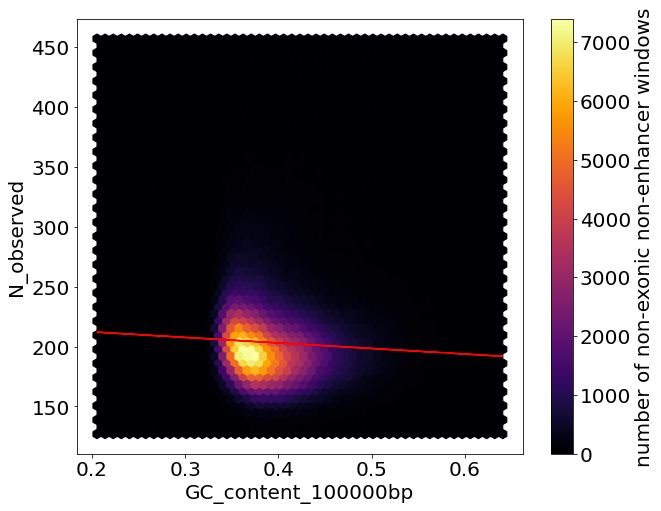

In [8]:
def correlate_GC_content_vs_N_observed(df, ylim=None):
  plt.figure(figsize=(10, 8))  
  plt.hexbin(df[f'GC_content_{GC_WINDOW_SIZE}bp'], df['N_observed'], gridsize=50, cmap='inferno')

  # Fit a linear regression line
  m, b = np.polyfit(df[f'GC_content_{GC_WINDOW_SIZE}bp'], df['N_observed'], 1)
  plt.plot(df[f'GC_content_{GC_WINDOW_SIZE}bp'], m*df[f'GC_content_{GC_WINDOW_SIZE}bp'] + b, color='red')

  plt.xlabel(f'GC_content_{GC_WINDOW_SIZE}bp')
  plt.ylabel('N_observed')
  plt.colorbar(label='number of non-exonic non-enhancer windows')
  plt.ylim(ylim)

correlate_GC_content_vs_N_observed(WINDOWS)

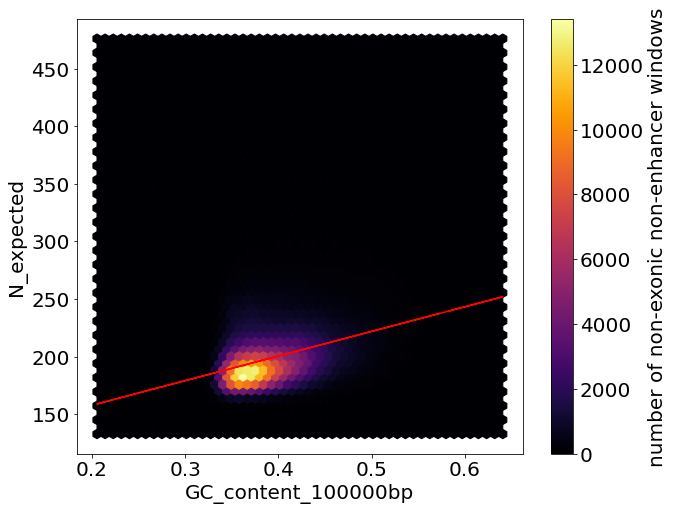

In [9]:
def correlate_GC_content_vs_N_expected(df, ylim=None):
  plt.figure(figsize=(10, 8))  
  plt.hexbin(df[f'GC_content_{GC_WINDOW_SIZE}bp'], df['N_expected'], gridsize=50, cmap='inferno')

  # Fit a linear regression line
  m, b = np.polyfit(df[f'GC_content_{GC_WINDOW_SIZE}bp'], df['N_expected'], 1)
  plt.plot(df[f'GC_content_{GC_WINDOW_SIZE}bp'], m*df[f'GC_content_{GC_WINDOW_SIZE}bp'] + b, color='red')

  plt.xlabel(f'GC_content_{GC_WINDOW_SIZE}bp')
  plt.ylabel('N_expected')
  plt.colorbar(label='number of non-exonic non-enhancer windows')
  plt.ylim(ylim)

correlate_GC_content_vs_N_expected(WINDOWS)

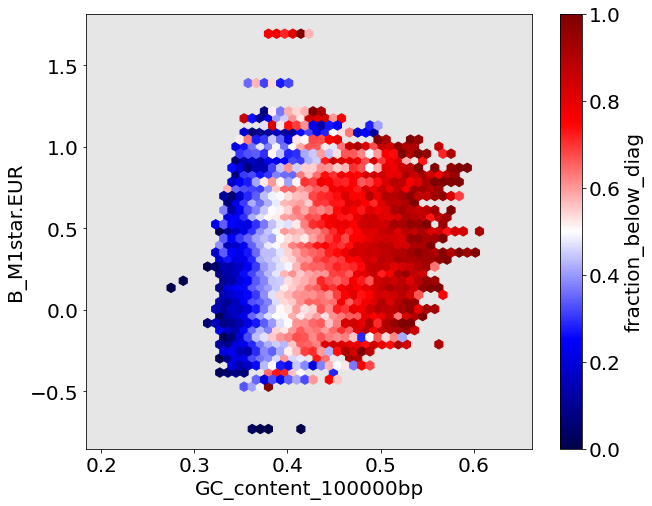

In [10]:
from matplotlib.colors import TwoSlopeNorm
import matplotlib.cm as cm

def fraction_below_diag_heat_map(df, x, y, min_windows=10):  
  df = df.copy()

  df['below_diag'] = df['N_observed'] < df['N_expected']

  plt.figure(figsize=(10, 8))  

  # Create a diverging colormap
  cmap = cm.get_cmap('seismic')  # Use cm.get_cmap instead of plt.get_cmap
  divnorm = TwoSlopeNorm(vmin=0, vcenter=0.5, vmax=1)

  plt.hexbin(
    df[x], 
    df[y], 
    C=df['below_diag'], 
    reduce_C_function=np.mean,
    gridsize=50, 
    cmap=cmap,
    norm=divnorm,
    mincnt=min_windows  # Minimum number of windows required for a hexbin to be displayed
  )

  plt.gca().set_facecolor(3*[0.9])  # Set the background color of the axis to a lighter shade of grey

  plt.xlabel(x)
  plt.ylabel(y)
  plt.colorbar(label='fraction_below_diag')

fraction_below_diag_heat_map(WINDOWS, x=f'GC_content_{GC_WINDOW_SIZE}bp', y='B_M1star.EUR')  

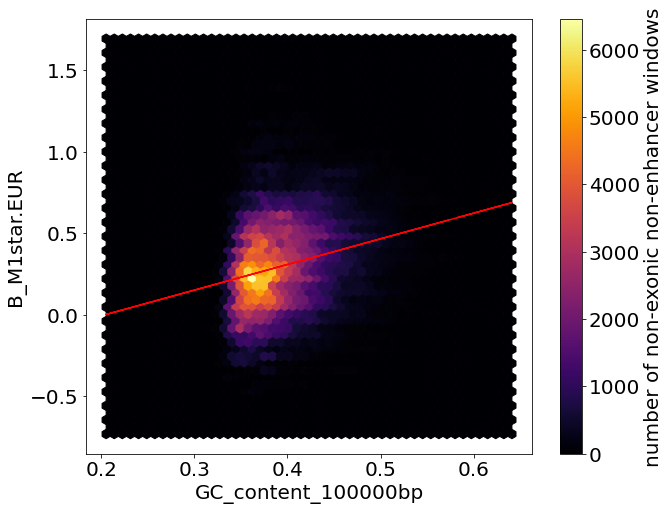

In [11]:
def window_count_heat_map(df, x, y, min_windows=0):
  plt.figure(figsize=(10, 8))  

  # Fit a line to the data
  df = df.dropna(subset=[y])  
  m, b = np.polyfit(df[x], df[y], 1)

  plt.hexbin(
    df[x], 
    df[y], 
    gridsize=50, 
    cmap='inferno',
    mincnt=min_windows  # Minimum number of windows required for a hexbin to be displayed
  )

  # Plot the line
  plt.plot(df[x], m*df[x] + b, color='red')

  plt.xlabel(x)
  plt.ylabel(y)
  plt.colorbar(label='number of non-exonic non-enhancer windows')

window_count_heat_map(WINDOWS, x=f'GC_content_{GC_WINDOW_SIZE}bp', y='B_M1star.EUR')